In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2902,2910,ham,"Subject: f . o . m . hpl nom . eff . april 1 ,...",0
4432,4005,spam,Subject: re : gussing movies for paliourg\r\np...,1
2780,1312,ham,"Subject: re : fuel\r\npat , could you shed a l...",0
5139,3566,ham,Subject: re : tglo status\r\ncost centers 1181...,0
3957,4286,spam,Subject: network cable tester and free ! rj - ...,1


In [5]:
df.shape

(5171, 4)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['label_num'],
                                                    test_size=0.3,
                                                    random_state=0)

In [7]:
x_train.shape

(3619,)

In [8]:
x_test.shape

(1552,)

In [9]:
x_test

1789    Subject: ship channel hub co\r\nplease review ...
2277    Subject: feb 2000 intercompany accrual varianc...
2618    Subject: meter 981318\r\ndaren ,\r\nthe above ...
3144    Subject: via - ggra is lousy mizar\r\nanti\r\n...
3756    Subject: potential list - feb . 2001\r\ndaren ...
                              ...                        
1380    Subject: midcon transport usage tickets - - ma...
4793    Subject: re : elders\r\nclass party\r\ncapture...
3838    Subject: hpl nom for june 9 , 2000\r\n( see at...
1452    Subject: new product ! cialis soft tabs .\r\nh...
3520    Subject: help his husband with the pain\r\nyou...
Name: text, Length: 1552, dtype: object

In [10]:
y_test

1789    0
2277    0
2618    0
3144    1
3756    0
       ..
1380    0
4793    0
3838    0
1452    1
3520    1
Name: label_num, Length: 1552, dtype: int64

In [11]:
y_train

2166    1
1271    0
1021    1
3323    0
2795    1
       ..
4931    1
3264    1
1653    1
2607    0
2732    0
Name: label_num, Length: 3619, dtype: int64

In [12]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [13]:
x_train_vec

<3619x40647 sparse matrix of type '<class 'numpy.int64'>'
	with 321855 stored elements in Compressed Sparse Row format>

In [14]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB()

In [15]:
# Predict on the test set
y_pred = model.predict(x_test_vec)

In [16]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


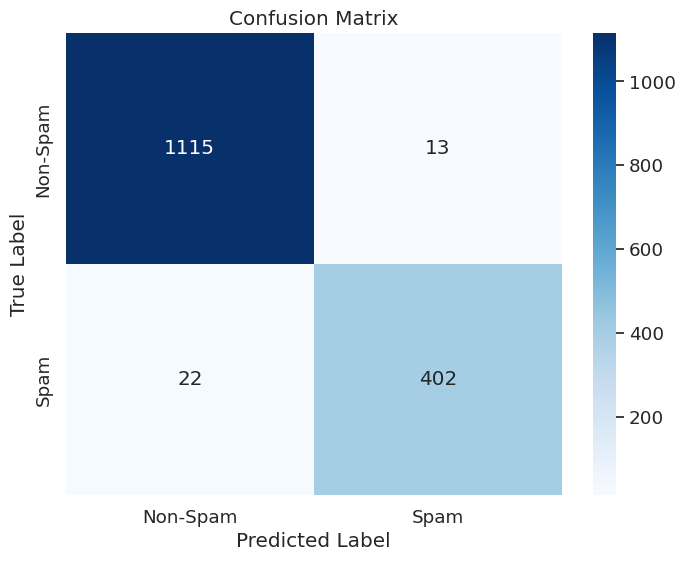

In [18]:
# Assuming y_true contains true labels and y_pred contains predicted labels
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Non-Spam', 'Spam']

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and color bar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show plot
plt.show()


In [19]:
# Test with a custom message
custom_message = ["""Hi again,
Your case has been reviewed and we granted a new attempt for you to verify. Please make sure you follow the previous instructions and make sure that your photos are clear and well lit, specially your selfie. 
"""]

In [20]:
custom_message_vec = vectorizer.transform(custom_message)
prediction = model.predict(custom_message_vec)

In [21]:
prediction

array([0])

In [22]:
print(f"Custom message prediction: {prediction[0]}")
# type(prediction[0])

Custom message prediction: 0


In [23]:
# # Save the model and vectorizer
joblib.dump(model, 'spam_ham_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']